In [1]:
import tensorflow as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import os
import cv2 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [2]:
filenames = os.listdir("../Assignment_3/cats-vs-dogs/train/train")

categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append('dog')
    else:
        categories.append('cat')
df = pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [3]:
df.head()

filename category
0     cat.0.jpg      cat
1     cat.1.jpg      cat
2    cat.10.jpg      cat
3   cat.100.jpg      cat
4  cat.1000.jpg      cat

<Axes: >

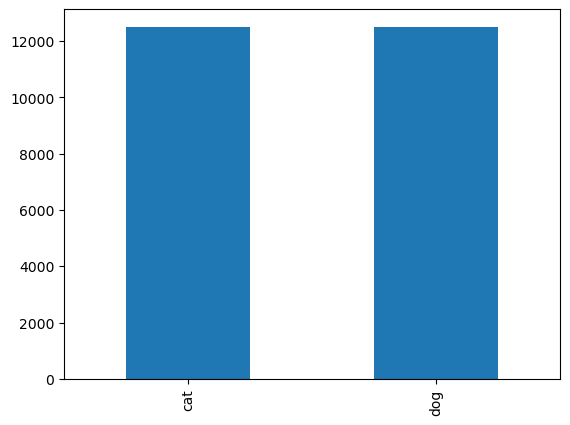

In [4]:
df['category'].value_counts().plot.bar()

In [5]:
# import random
# sample = random.choice(filenames)
# image = cv2.imread("../Assignment_3/cats-vs-dogs/train/train"+sample)
# type(image)
# image = image.astype(float)
# plt.imshow(image)
# plt.show()

In [6]:
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_CHANNELS = 3
IMAGE_SIZE = (128,128)

In [7]:
vgg_16 = tf.keras.applications.vgg16.VGG16(include_top= False,weights='imagenet',input_shape= (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))

for layer in vgg_16.layers:
    layer.trainable = False

In [8]:
model =Sequential()
model.add(vgg_16)
model.add(Flatten())
model.add(Dense(50, activation= 'relu'))
model.add(Dense(75, activation= 'relu'))
model.add(Dense(2, activation = 'softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 50)                409650    
                                                                 
 dense_1 (Dense)             (None, 75)                3825      
                                                                 
 dense_2 (Dense)             (None, 2)                 152       
                                                                 
Total params: 15128315 (57.71 MB)
Trainable params: 413627 (1.58 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
from sklearn.model_selection import train_test_split
train_df,validate_df=train_test_split(df, test_size=0.20, random_state=42)
train_df=train_df.reset_index(drop=True)
validate_df=validate_df.reset_index(drop=True)

In [12]:
print(train_df.shape)
print(validate_df.shape)

(20000, 2)
(5000, 2)


In [13]:
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15
print(train_df.shape[0],validate_df.shape[0])

20000 5000


In [14]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [15]:
train_generator = train_datagen.flow_from_dataframe(
train_df,
"../Assignment_3/cats-vs-dogs/train/train",
x_col='filename',
y_col='category',
target_size=IMAGE_SIZE,
class_node="categorical",
batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.


In [16]:
validation_datagen = ImageDataGenerator (rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
validate_df,
"../Assignment_3/cats-vs-dogs/train/train",
x_col="filename",
y_col="category",
target_size=IMAGE_SIZE,
class_mode="categorical",
batch_size= batch_size)

Found 5000 validated image filenames belonging to 2 classes.


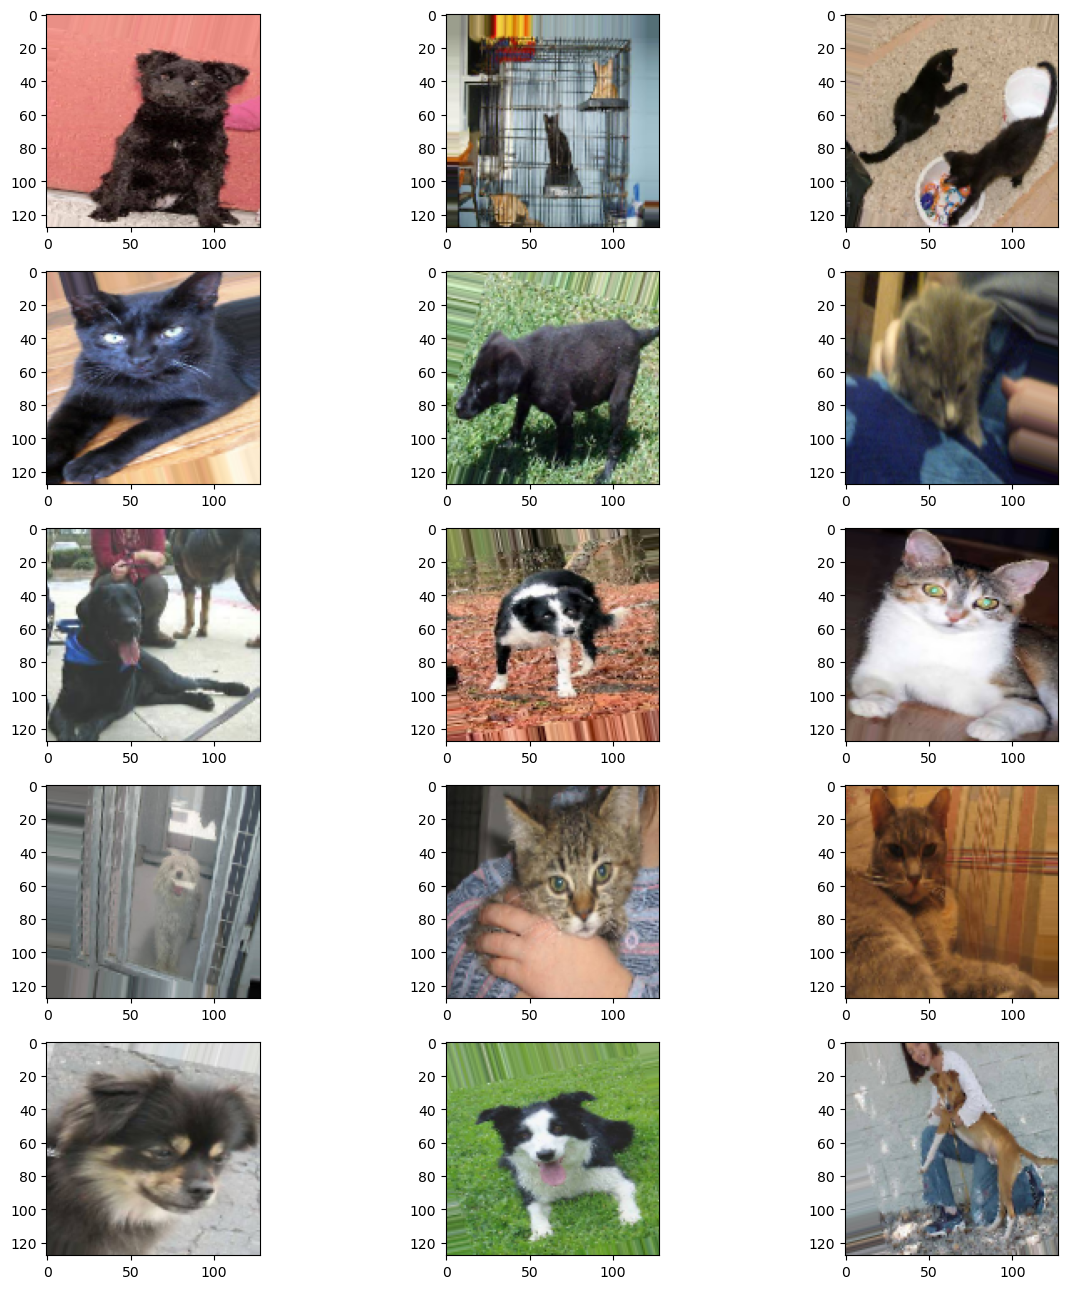

In [17]:
plt.figure(figsize=(13, 13))

for i in range(0, 15):

    plt.subplot(5, 3, i+1)

    for X_batch, Y_batch in train_generator:

        image = X_batch[0]

        plt.imshow(image)

        break

plt.tight_layout()

plt.show()

In [18]:
hist = model.fit(
train_generator,
epochs=2,
validation_data=validation_generator,
validation_steps=total_validate//batch_size,
steps_per_epoch=total_train//batch_size)

Epoch 1/2
1333/1333 [==============================] - 2921s 2s/step - loss: 0.3418 - accuracy: 0.8460 - val_loss: 0.3113 - val_accuracy: 0.8627
Epoch 2/2
1333/1333 [==============================] - 2605s 2s/step - loss: 0.2917 - accuracy: 0.8730 - val_loss: 0.2548 - val_accuracy: 0.8953


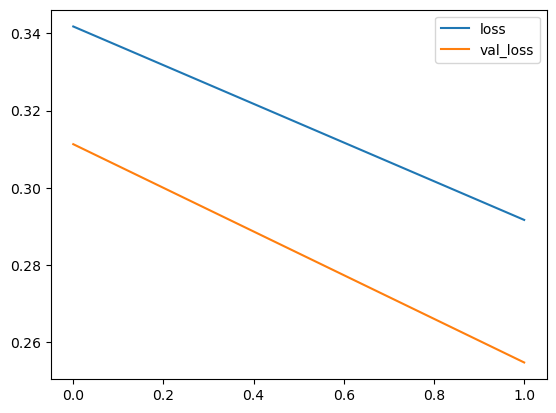

In [19]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

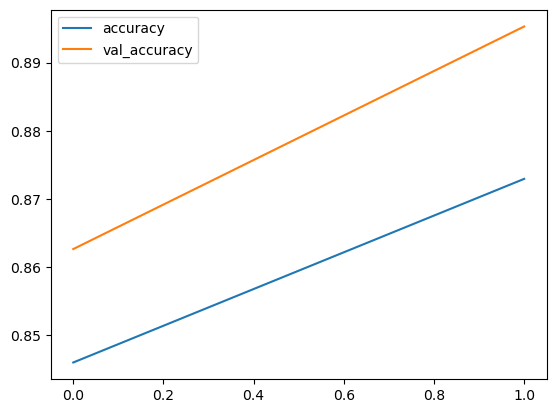

In [20]:
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()